In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("train.csv")
df.shape

(404290, 6)

In [4]:
df.sample(10)

id    qid1    qid2  \
248070  248070  361424  361425   
258785  258785  374423  374424   
213153  213153  318409  318410   
3941      3941    7806    7807   
150245  150245  236501  236502   
107084  107084  176253  176254   
48769    48769   86898   86899   
49053    49053   87347   87348   
255303  255303  370177  370178   
185439  185439  283098  283099   

                                                question1  \
248070  What are the effects of oxymorons in poetry? W...   
258785  How can I set up a DC++ network in college wif...   
213153  What does it mean when they are advertising an...   
3941           Which is the best gaming laptop under 40k?   
150245  What would you do if you had $100 million doll...   
107084  Is there any specific way to write answers in ...   
48769   Why are Germans obsessed with putting "GmbH" o...   
49053   Is 300 KWD/month salary sufficient for living ...   
255303   Is it possible for cows and goats eating fruits?   
185439  How different would the world be if the theory...   

                                                question2  is_duplicate  
248070            What are examples of structured poetry?             0  
258785  What are ways to Configure DC++ for Home Wifi ...             0  
213153  What is the take home pay on $160,000 salary i...             0  
3941     Which is the best gaming laptop under 40,000 rs?             1  
150245    What can you do/build with 100 million dollars?             1  
107084  How do I score well in CBSE XII arts subject b...             0  
48769   How come download for offline viewing later on...             0  
49053   Is 650 KWD/month salary sufficient for living ...             0  
255303                              One assist insurance?             0  
185439  What would happen if science and military swap...             0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [6]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [7]:
df.duplicated().sum()

0

is_duplicate
0    255027
1    149263
Name: count, dtype: int64
is_duplicate
0    63.080215
1    36.919785
Name: count, dtype: float64


<Axes: xlabel='is_duplicate'>

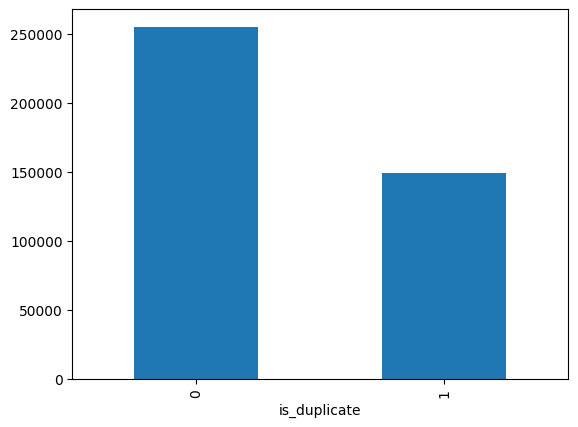

In [12]:
#distribution b/w duplicate and non-duplicate questions

print(df['is_duplicate'].value_counts())
print((df['is_duplicate'].value_counts()/df['is_duplicate'].count())*100)
df['is_duplicate'].value_counts().plot(kind='bar')

In [9]:
# Repeated Quetions
qid=pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
print('Number of unique questions', np.unique(qid).shape[0])
x=qid.value_counts()>1
print('Number of questions getting repeated',x[x].shape[0])

Number of unique questions 537933
Number of questions getting repeated 111780


In [10]:
np.unique(qid).shape[0]

537933

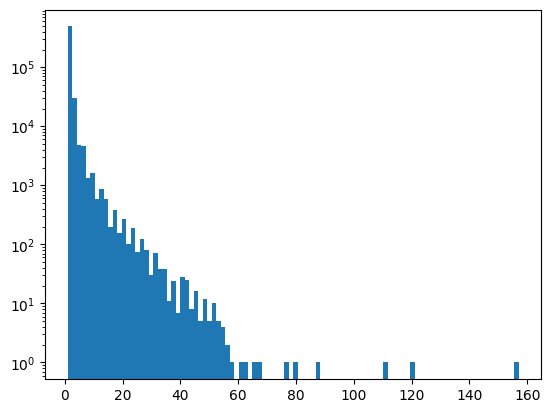

In [11]:
# repeated questions histogram
plt.hist(qid.value_counts().values,bins=100)
plt.yscale('log')
plt.show()